In [2]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tsp

In [3]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [4]:
TSP_NAME = "bayg29"  
tsp = tsp.TravelingSalesmanProblem(TSP_NAME)

length = 29, locations = [array([1150., 1760.], dtype=float32), array([ 630., 1660.], dtype=float32), array([  40., 2090.], dtype=float32), array([ 750., 1100.], dtype=float32), array([ 750., 2030.], dtype=float32), array([1030., 2070.], dtype=float32), array([1650.,  650.], dtype=float32), array([1490., 1630.], dtype=float32), array([ 790., 2260.], dtype=float32), array([ 710., 1310.], dtype=float32), array([840., 550.], dtype=float32), array([1170., 2300.], dtype=float32), array([ 970., 1340.], dtype=float32), array([510., 700.], dtype=float32), array([750., 900.], dtype=float32), array([1280., 1200.], dtype=float32), array([230., 590.], dtype=float32), array([460., 860.], dtype=float32), array([1040.,  950.], dtype=float32), array([ 590., 1390.], dtype=float32), array([ 830., 1770.], dtype=float32), array([490., 500.], dtype=float32), array([1840., 1240.], dtype=float32), array([1260., 1500.], dtype=float32), array([1280.,  790.], dtype=float32), array([ 490., 2130.], dtype=float32)

16, 28: location1 = [230. 590.], location2 = [ 360. 1980.] => distance = 1396.06591796875
17, 18: location1 = [460. 860.], location2 = [1040.  950.] => distance = 586.9412231445312
17, 19: location1 = [460. 860.], location2 = [ 590. 1390.] => distance = 545.7105712890625
17, 20: location1 = [460. 860.], location2 = [ 830. 1770.] => distance = 982.3441162109375
17, 21: location1 = [460. 860.], location2 = [490. 500.] => distance = 361.2478332519531
17, 22: location1 = [460. 860.], location2 = [1840. 1240.] => distance = 1431.363037109375
17, 23: location1 = [460. 860.], location2 = [1260. 1500.] => distance = 1024.4998779296875
17, 24: location1 = [460. 860.], location2 = [1280.  790.] => distance = 822.9823608398438
17, 25: location1 = [460. 860.], location2 = [ 490. 2130.] => distance = 1270.354248046875
17, 26: location1 = [460. 860.], location2 = [1460. 1420.] => distance = 1146.1239013671875
17, 27: location1 = [460. 860.], location2 = [1260. 1910.] => distance = 1320.037841796875


In [5]:
POPULATION_SIZE = 300
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 1
P_CROSSOVER = 0.9 
P_MUTATION = 0.1

In [6]:
toolbox = base.Toolbox()

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [8]:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

In [9]:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

In [10]:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

In [11]:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [12]:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # return a tuple

In [13]:
toolbox.register("evaluate", tpsDistance)

In [14]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))

In [15]:
def main():

    population = toolbox.populationCreator(n=POPULATION_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    plt.figure(1)
    tsp.plotData(best)

    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()


gen	nevals	min    	avg  
0  	300   	21103.3	26457
1  	279   	19562.4	25128.9
2  	275   	19456.5	24267.3
3  	279   	19760.9	23592  
4  	278   	19406.4	22963.5
5  	276   	19105.2	22480.7
6  	281   	17802.4	22129.9
7  	279   	18160.2	21581.5
8  	274   	17691.3	21253.6
9  	277   	16011.9	20877.8
10 	268   	16011.9	20597.9
11 	279   	15878.8	20413.2
12 	269   	14589.1	20188.2
13 	272   	14589.1	19987.8
14 	281   	15182.9	19910.4
15 	276   	15836.2	19437  
16 	276   	15687.4	19117.2
17 	282   	15426.5	19039.4
18 	282   	14905.2	18696.7
19 	269   	15020.4	18614.9
20 	275   	13346.3	18424  
21 	276   	14711.4	18330.1
22 	275   	13139.1	18312  
23 	274   	13139.1	18005  
24 	278   	13002.5	17725.6
25 	262   	12203.5	17543.2
26 	274   	13157.3	17285.2
27 	260   	12918.6	16946.3
28 	271   	12918.6	16646  
29 	262   	12918.6	16441  
30 	279   	12652.9	16194.2
31 	265   	12652.9	15910.6
32 	278   	12565.6	15942.4
33 	278   	12520.5	15682  
34 	283   	12436.1	15569.5
35 	272   	12214  	15441.9
36 	2

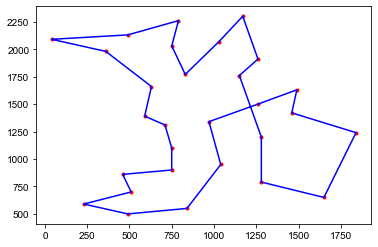

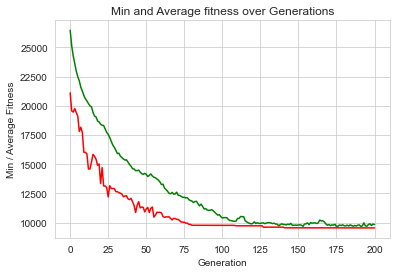

In [16]:
if __name__ == "__main__":
    main()
